# De World Happiness Score in zes grafieken

Link naar Github repository: https://github.com/HamidA7777/IV

### Introductie

De World Happiness Score wordt elk jaar voor vele landen gemeten, deze wordt dan in een zogeheten World Happiness Report gepubliceerd. De World Happiness Score wordt aan de hand van verschillende criteria gemeten, zoals bijvoorbeeld gezondheid en welvaart, hiermee kan er een beeld geschetst worden over de wereld op het gebied van hoe blij mensen zijn met hoe het eraan toe is in het desbetreffende land. Zo hebben wij vijf World Happiness Reports verzameld over de periode van 2015 tot en met 2019, hiermee hebben we analyses gedaan waarbij we gekeken hebben van welke variabelen de World Happiness Score over het algemeen van afhangt. Hierbij is het natuurlijk ook belangrijk dat je vanuit verschillende perspectieven analyses maakt, aangezien het niet altijd zwart-wit is. Hierom hebben wij vanuit twee perspectieven analyses gemaakt. In het eerste perspectief hebben we onderzocht hoe de absolute waarde van één of meer specifieke variabelen de Happiness Score (bij verschillende landen) beïnvloedt, hierbij hebben we dus gekeken of er een bepaald verband is wanneer de variabele in waarde toeneemt, of dan de Happiness Score ook toeneemt. In het tweede perspectief hebben we de relatieve toename/afname van een variabele over de jaren heen onderzocht, en gekeken hoe de Happiness Score ieder jaar beïnvloedt werd door de variabele en of er een bepaald verband is. 


### Dataset en preprocessing

Wij hebben vijf datasets gebruikt, ieder dataset bevat informatie over de World Happiness binnen de periode 2015-2019. Al deze datasets kunnen gedownload worden op de volgende site: https://www.kaggle.com/datasets/unsdsn/world-happiness. Elke dataset bevat min of meer dezelfde variabelen: **Country**, **Region**, **Happiness Rank**, **Happiness Score**, **Standard Error**, **Economy (GDP per Capita)**, **Family**, **Health (Life Expectancy)**, **Freedom**, **Trust (Government Corruption)**, **Generosity** en **Dystopia Residual**. Deze vijf datasets wilden we samenvoegen in één dataset, die ook opgeschoond is, dat vereiste nogal wat preprocessing. Dit komt omdat de dataset van 2017 qua betekenis dezelfde variabelen had als de dataset van 2015, alleen de benaming was iets anders, ook had het een aantal extra variabelen die niet relevant waren voor onze analyses en ook niet in de dataset van 2015 voorkwamen, dit gold ook voor de dataset van 2016. We hadden de dataset van 2015 als referentie gebruikt, omdat dit de meest schone dataset was qua relevantie en benaming van de variabelen. De datasets van 2018 en 2019 vereisten ook wat preprocessing, omdat de variabelen hier ook een net andere benaming hadden, ook ontbrak hier de "Dystopia Residual" variabele. Nu wisten we welke variabelen we willen behouden, welke we niet wilden en hoe we de datasets moesten opschonen. Als eerst hebben we de variabelen die we niet wilden gebruiken uit de dataset gehaald, voor de dataset van 2015 waren dit de variabelen "Region" en "Standard Error", van 2016 de variabelen "Region","Lower Confidence Interval" en "Upper Confidence Interval" en van 2017 de variabelen "Whisker.high" en "Whisker.low". Voor de datasets van 2018 en 2019 hebben we geen variabelen weggehaald. Hierna hebben we de benaming van de variabelen aangepast, zodat het overeenkwam met de benaming zoals weergegeven in de dataset van 2015, zo hebben we bijvoorbeeld de variabele "Happiness.Rank" uit de dataset van 2017 veranderd naar "Happiness Rank". Ditzelfde hebben we gedaan voor de datasets van 2018 en 2019. We hadden hierna opgemerkt dat de volgorde van de variabelen in de datasets van 2015, 2016 en 2017 overeenkwamen, maar in die van 2018 en 2019 niet, dus we hadden de volgorde van de kolommen in de datasets van 2018 en 2019 aangepast zodat het overeenkwam met de overige datasets. Dit was nodig zodat de volgende stap makkelijker verloopt, het samenvoegen van de datasets. Nu we de datasets hebben samengevoegd, zagen we dat er in de kolom "Dystopia Residual" missing values voorkwamen, dit kwam omdat de datasets van 2018 en 2019 geen informatie hadden over deze kolom. We hebben dit probleem opgelost door de gemiddelde van de voorgaande jaren te nemen per land, en vervolgens de missing values van het desbetreffende land te vervangen met de gemiddelde over de jaren heen waar er wel informatie over was. Ten slotte hebben we nog een "Year" kolom toegevoegd aan onze samengevoegde dataset, deze variabele was nodig om bepaalde visualisaties te kunnen maken. Nu was onze dataset klaar en hebben we 11 variabelen die we kunnen gebruiken om visualisaties te maken: **Country**, **Happiness Rank**, **Happiness Score**, **Economy (GDP per Capita)**, **Family**, **Health (Life Expectancy)**, **Freedom**, **Trust (Government Corruption)**, **Generosity**, **Dystopia Residual** en **Year**.


### Invloed van de economie op de Happiness Score

De economie kan een groot invloed hebben op de Happiness Score van landen. In de onderstaande grafiek kunnen we per land zien hoe de evolutie van de economie is, en hoe dit de Happiness Score van het land beïnvloedt. Er valt een interessant patroon op te merken, over het algemeen lijken de punten op de grafiek een opwaartse trend te hebben naarmate de economie van een land verbetert. Met de zwarte trendlijn wordt de algemene trend ook zichtbaar, en wordt het vermoeden dat de Happiness Score toeneemt naarmate de economie verbetert, bevestigd. Dit wijst er dus op dat als de economie van een land verbetert, dat de Happiness Score van het land ook verbetert. 

In [75]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/home/hamid/IV/docs/cleaned_data.csv').drop(columns=['Unnamed: 0'])

fig = px.scatter(
    df, 
    x='Economy (GDP per Capita)', 
    y='Happiness Score', 
    color='Country', 
    trendline='ols', 
    trendline_scope='overall',
    trendline_color_override='black'
    )

fig.update_layout(
    title="De invloed van de economie op de Happiness Score",
    xaxis_title="Economy (GDP per Capita)",
    yaxis_title="Happiness Score",
    annotations=[dict(
        x=0.5,
        y=-0.2,
        showarrow=False,
        text="Op de x-as is de Economy variabele weergegeven, een grotere waarde betekent dat de economie verbetert. Op de y-as is de Happiness Score weer-<br>gegeven, dit geeft aan hoe blij mensen zijn. Uit de grafiek kan per land afgelezen worden hoezeer de Economy variabele de Happiness Score beïnvloedt.",
        xref="paper",
        yref="paper",
        font=dict(size=9.75)
        )
    ]
)

fig.show()

### Invloed van de economie en gezondheid op de Happiness Score

Het is duidelijk dat er een verband is tussen de economie en de Happiness Score, maar wordt de Happiness Score ook beïnvloedt door twee variabelen die mogelijk onderling elkaars effect op de Happiness Score versterken / verzwakken?
In de grafiek hieronder zijn de scores van de gezondheid, economie en Happiness onderverdeeld in vijf groepen, er kan dus worden afgeleid welke combinaties van groepen leiden tot een hogere Happiness Score. Er zijn interessante patronen op te merken, als eerst blijkt dat als de gezondheid een hoge score heeft, en de economie ook een hoge score heeft, dat de Happiness Score dan ook hoog is. Ten tweede blijkt dat als de gezondheid een lage score heeft, en de economie een gemiddelde score, dat de Happiness Score dan "Below Average" is. Er zijn echter ook aparte gevallen, waarbij de gezondheidsscore "Above Average" is, en de score van de economie "Average" is, dat dan de Happiness Score "Below Average" is, hierbij kan er een andere variabele een rol gespeeld hebben waarbij de Happiness Score wat lager. Over het algemeen blijkt wel dat de scores van de twee variabelen samengenomen een versterkend of verzwakkend effect hebben op de Happiness Score, afhankelijk van de individuele scores van de variabelen. 

In [76]:
labels = ['Low', 'Below Average', 'Average', 'Above Average', 'High']
cut_quantized = pd.qcut(df['Happiness Score'], q=5, labels=labels)
health_quantized = pd.qcut(df['Health (Life Expectancy)'], q=5, labels=labels)
economy_quantized = pd.qcut(df['Economy (GDP per Capita)'], q=5, labels=labels)
colorscale = [[0,'darkblue'], [0.25,'purple'],[0.5,'pink'],[0.75,'orange'],[1,'lightyellow']]

parcats_data = [
    go.Parcats(
        dimensions=[
            {'label': 'Health (Life Expectancy)', 'values': health_quantized, 'categoryorder': 'array', 'categoryarray': labels},
            {'label': 'Economy (GDP per Capita)', 'values': economy_quantized, 'categoryorder': 'array', 'categoryarray': labels},
            {'label': 'Happiness Score', 'values': cut_quantized, 'categoryorder': 'array', 'categoryarray': labels}
        ],
        line={'color': cut_quantized.astype('category').cat.codes, 'colorscale': colorscale},
    )
]

layout = go.Layout(
    title='De invloed van de Health en Economy variabelen op de Happiness Score',
    margin_b=90,
    annotations = [dict(xref='paper',
                        yref='paper',
                        x=0.5, y=-0.25,
                        showarrow=False,
                        text='Voor alle variabelen geldt dat ze gekwantiseerd zijn in 5 categorieën. Hoe donkerder de kleur, hoe lager de score. Door te kijken welke com-<br>binatie van groepen binnen de Health en Economy variabelen naar een bepaalde groep binnen de Happiness Score leiden, valt er verbanden te zien.')])

fig_parcats = go.Figure(data=parcats_data, layout=layout)
fig_parcats.show()

### Vrijheid

Vrijheid kan ook een rol spelen bij de Happiness van mensen. In de onderstaande grafiek kunnen we de relatie tussen de vrijheid en de Happiness Score zien. Er valt op te merken dat er over het algemeen een opwaartse trend is als de score van de vrijheid toeneemt, dit wordt ook bevestigd met de roze trendlijn die de algemene trend van de data weergeeft. Het lijkt er dus op dat als de vrijheid in een land toeneemt, dat de Happiness Score ook toeneemt. 

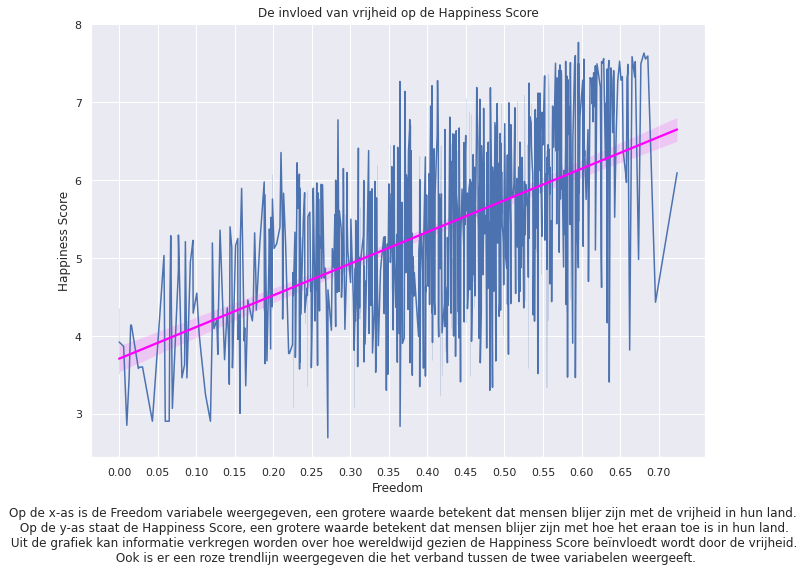

In [77]:
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(11,8)})

ax1 = sns.lineplot(
    df,
    x='Freedom',
    y='Happiness Score'
)

ax1.set_xticks(np.arange(df['Freedom'].min(), df['Freedom'].max(), 0.05))

ax2 = sns.regplot(
    df,
    x='Freedom',
    y='Happiness Score',
    color='magenta',
    scatter=False
)

ax2.set_xticks(np.arange(df['Freedom'].min(), df['Freedom'].max(), 0.05))

caption='Op de x-as is de Freedom variabele weergegeven, een grotere waarde betekent dat mensen blijer zijn \
met de vrijheid in hun land. \n Op de y-as staat de Happiness Score, een grotere waarde betekent dat mensen \
blijer zijn met hoe het eraan toe is in hun land. \n Uit de grafiek kan informatie verkregen worden over hoe \
wereldwijd gezien de Happiness Score beïnvloedt wordt door de vrijheid. \n Ook is er een roze trendlijn \
weergegeven die het verband tussen de twee variabelen weergeeft.'
plt.text(0.37,1.1,caption,ha='center',fontsize=12)
plt.title('De invloed van vrijheid op de Happiness Score')
plt.show()

We hebben gezien dat als we naar de absolute waardes van bepaalde variabelen kijken, dat er wel degelijk een verband is met de Happiness Score. Maar wacht eens even, wat nou als we naar de relatieve veranderingen van variabelen over de jaren heen kijken? Is er dan ook een verband met de Happiness Score?

### Relatieve verandering gezondheid

Bij de relatieve verandering van de gezondheid wordt gekeken met hoeveel procent de score ieder jaar is toegenomen of afgenomen ten opzichte van het vorige jaar. Uit de onderstaande choropletenkaart vallen er interessante inzichten te halen, als we naar Brazilië kijken, dan neemt de Happiness Score af als de gezondheidsscore toeneemt, en vice versa. Dit is, om nog een aantal voorbeelden te geven, over het algemeen ook zo voor Rusland, Argentinië, Australië en Turkije. Hier lijkt een omgekeerd evenredig verband in te zitten, wat in dit geval niet logisch is, je zou verwachten dat de Happiness Score toeneemt als de gezondheid verbetert. Er zijn echter wel landen waar er wel een logisch verband is, zoals Canada, Zweden, Engeland en Saudi Arabië, hier neemt de Happiness Score toe als de gezondheidsscore ook toeneemt. Maar er kan hier nog verder onderzoek naar gedaan worden, waarom er een omgekeerd evenredig verband in zit bij sommige landen. 

In [78]:
rel_change = df.groupby('Country')['Health (Life Expectancy)'].pct_change()

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Happiness Score',
    hover_name='Country',
    hover_data=[round(rel_change,3).astype(str)+'%'],
    animation_frame='Year',
    labels={'hover_data_0':'Relative Change '+rel_change.name}
)

fig.update_layout(
    title="De invloed van de relatieve verandering van de Health variabele op de Happiness Score",
    annotations=[dict(
        x=0.5,
        y=-0.22,
        showarrow=False,
        text="Door over elk land op de wereldkaart heen te gaan, kun je informatie vinden over het jaar, de relatieve verandering van de Health variabele <br> en de Happiness Score van het desbetreffende land. Op de kleurenbalk is de Happiness Score met verschillende kleuren weergegeven, <br> afhankelijk van hoe hoog de score is. Door op de startknop linksonder te klikken, valt er voor elk jaar de verandering <br> van de Happiness Score te zien, en ook de relatieve verandering van de Health variabele ten opzichte van het vorige jaar. <br> Voor 2015 staat er bij de relatieve verandering van de Health variabele 'nan%', omdat er geen data is voor 2014.",
        xref="paper",
        yref="paper",
        font=dict(size=10)
        )
    ]
)

fig.show()

### Relatieve verandering Trust

In de onderstaande figuur zijn er twee pie plots. De eerste pie plot laat de wereldwijde score van de Trust variabele per jaar zien, hieruit kan afgelezen worden wat de relatieve verandering van de Trust variabele per jaar is. In de tweede pie plot wordt de wereldwijde Happiness Score per jaar laten zien, hieruit kan afgelezen worden wat de relatieve verandering van de Happiness Score per jaar is. Als de twee pie plots met elkaar vergeleken worden, dan valt er een interessant patroon te zien, als de score van de Trust variabele afneemt, dan neemt de Happiness Score ook af. Dus er is een verband tussen de Trust variabele en de Happiness Score.

In [79]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=df['Year'],
    values=df['Trust (Government Corruption)'],
    marker_colors=['#fbfcb8','#fecb52','pink','purple','darkblue'],
    name='Trust (Government Corruption)',
    legendgroup = '1',
    legendgrouptitle_text = 'Jaren voor Trust plot'
),1,1)

colors={2015:'#fbfcb8',2016:'#fecb52',2017:'darkblue',2018:'purple',2019:'#fecb52'}

fig.add_trace(go.Pie(
    labels=df['Year'],
    values=df['Happiness Score'],
    marker_colors=[colors[year] for year in df['Year']],
    sort=False,
    name='Happiness Score',
    legendgroup = '2',
    legendgrouptitle_text = 'Jaren voor Happiness Score plot'
),1,2)

fig.update_traces(hole=0.4, hoverinfo="label+percent+name")

fig.update_layout(
    title='De wereldwijde score van de Trust variabele per jaar VS De wereldwijde score van de Happiness Score per jaar',
    annotations=[dict(text='Trust', x=0.18, y=0.5, font_size=16, showarrow=False),
                dict(text='Happiness', x=0.8625, y=0.5, font_size=16, showarrow=False),
                dict(x=0.56,y=-0.24,showarrow=False,text="In de linker pie plot is er voor de jaren in de periode 2015-2019 de score van de Trust variabele van elk land bij elkaar opgeteld. <br> Hiermee kan er een wereldwijde beeld geschetst worden hoe betrouwbaar de regering is en hoe dit per jaar verandert. <br> In de rechter pie plot is er voor de jaren in de periode 2015-2019 de Happiness Score van elk land bij elkaar opgeteld.<br> Hiermee kan er een wereldwijde beeld geschetst worden hoe blij mensen zijn en hoe dit per jaar verandert. <br> Hoe donkerder de kleur is, hoe lager de score is. Door de linker pie plot met de rechter pie plot te vergelijken, <br> kan er bekeken worden of er een verband is tussen de relatieve verandering van de Trust variabele met de relatieve verandering van de Happiness Score.",xref="paper",yref="paper",font=dict(size=10))]
)

fig.update_traces(
    marker = dict(line=dict(color = 'black', width = 2))
)

fig.show()